In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf

# Import MNIST data
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Pixel Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


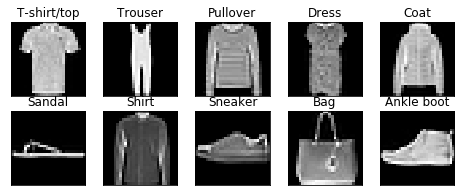

In [4]:
# Visualize dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig = plt.figure(figsize=(8,3))
for i in range(y_train.max()+1):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im, cmap='gray')
plt.show()

In [5]:
# Build a model with two FC layers using Keras API with Tensorflow backend
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

W0829 23:27:59.752357 4705805760 deprecation.py:506] From /Users/zohebabai/anaconda/envs/TensorflowProjects/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model for 5 epochs
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.4965 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3776 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3412 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3134 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2971 - acc: 0.8895


In [8]:
# Evaluate it on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3464 - acc: 0.8764
Test accuracy: 0.8764
